# Dataset Description

Problem Statement:

Source of Dataset:

Description of dataset:

Description of attributes:

# Exploratory Data Analysis and Data Visualization

Importing DataSet (19L-2707) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Scholarship_Recipients_And_Dollars_By_College_Code__Beginning_2009.csv")
#display(df)

Data Cleaning (19L-2707)

In [2]:
df.describe()

Academic Year  TAP College Code  Federal School Code  \
count    3046.000000       3046.000000          3046.000000   
mean     2013.292843       3162.854892          6157.010506   
std         2.879107       2684.914443          8426.348475   
min      2009.000000         10.000000             0.000000   
25%      2011.000000        880.000000          2763.500000   
50%      2013.000000       2111.500000          2847.000000   
75%      2016.000000       5540.000000          6782.000000   
max      2018.000000       8564.000000        107329.000000   

       Scholarship Headcount  Scholarship FTE  Scholarship Dollars  
count            3046.000000      3046.000000         3.046000e+03  
mean               70.163493        63.753162         1.271665e+05  
std               149.236615       139.030356         2.868787e+05  
min                 1.000000         0.000000         1.225000e+02  
25%                 3.000000         2.000000         9.776745e+03  
50%                15.000000        12.500000         4.526125e+04  
75%                69.000000        60.877500         1.231750e+05  
max              1568.000000      1517.210000         5.785755e+06

In [3]:
#df.info()
df.isnull().sum()

Academic Year            0
TAP College Code         0
Federal School Code      0
TAP College Name         0
TAP Sector Group         0
Scholarship Headcount    0
Scholarship FTE          0
Scholarship Dollars      0
dtype: int64

In [4]:
df = df.dropna('columns')

C:\Users\darkn\AppData\Local\Temp\ipykernel_11392\1930444514.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


In [5]:
df.shape

(3046, 8)

Univariate Analysis (19L-2707)

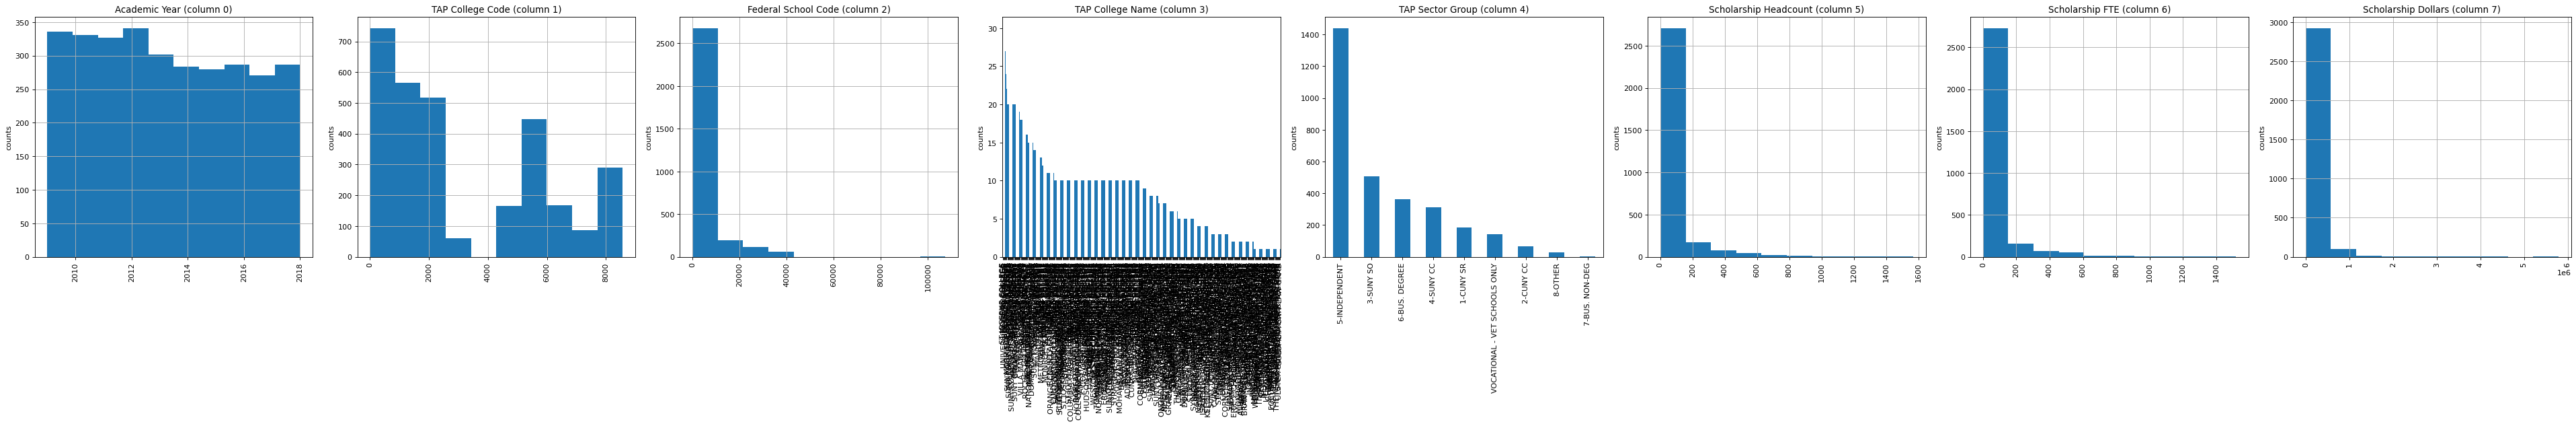

In [6]:
nGraphShown = 3000
nGraphPerRow = 8

nunique = df.nunique()
    
# For displaying purposes, pick columns that have between 1 and 50 unique values
df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 10000]] 
    
nRow, nCol = df.shape
    
columnNames = list(df)
    
nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    
plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    
for i in range(min(nCol, nGraphShown)):
    plt.subplot(nGraphRow, nGraphPerRow, i + 1)
    columnDf = df.iloc[:, i]
        
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
            
    plt.ylabel('counts')
    plt.xticks(rotation = 90)
    plt.title(f'{columnNames[i]} (column {i})')
        
plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.show()

Bivariate Analysis (19L-1135) 

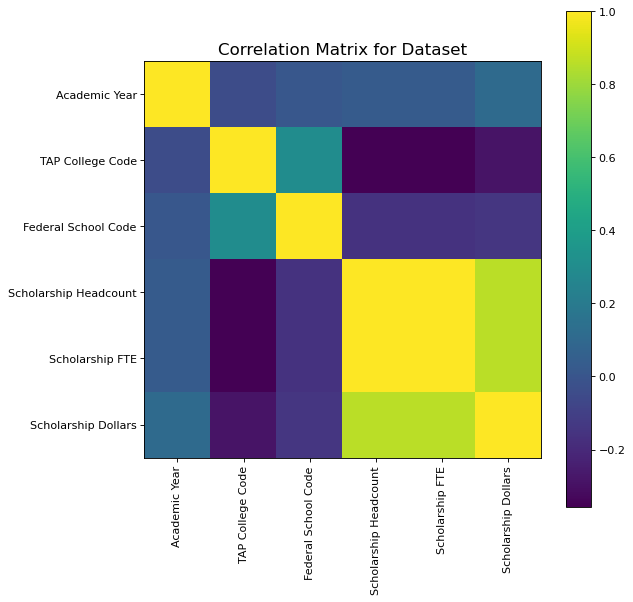

In [7]:
# keep columns where there are more than 1 unique values
df = df[[col for col in df if df[col].nunique() > 1]]
    
if df.shape[1] < 2:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
else:    
    corr = df.corr()
    
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    
    plt.title(f'Correlation Matrix for Dataset', fontsize=15)
    plt.show()

Multivariate Analysis (19L-1135)

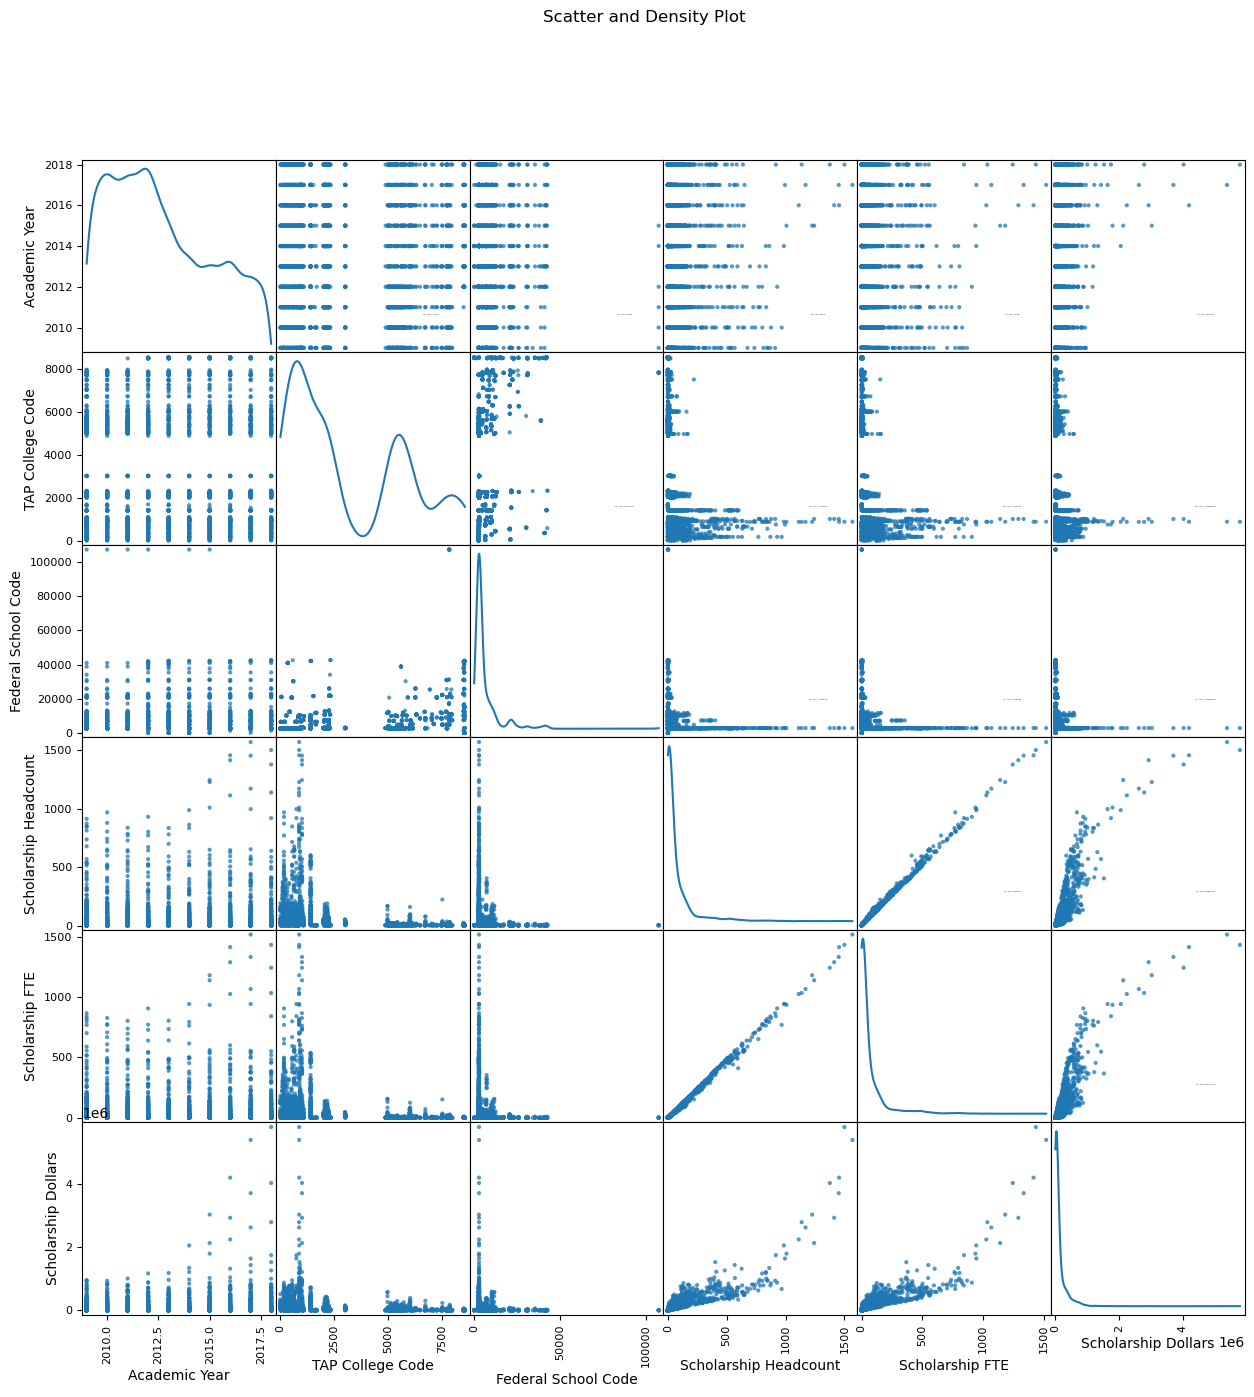

In [13]:
# keep only numerical columns
df = df.select_dtypes(include =[np.number])
    
# keep columns where there are more than 1 unique values
df = df[[col for col in df if df[col].nunique() > 1]] 
    
ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[15, 15], diagonal='kde')
    
corrs = df.cov().values
    
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=0.8)
plt.suptitle('Scatter and Density Plot')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform(df)
dfs = scaler.fit_transform(df)

Text(0, 0.5, 'Second principle component')

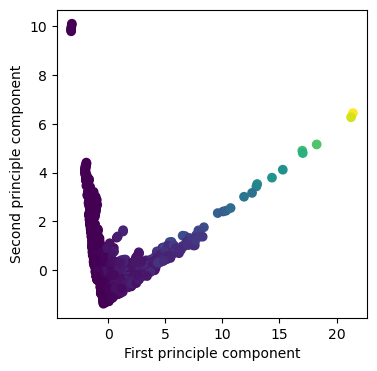

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
#pca.fit_transform(dfs)
dfp = pca.fit_transform(dfs)
plt.figure(figsize =(4,4))
plt.scatter(dfp[:,0],dfp[:,1], c = df['Scholarship Dollars'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

Text(0.5, 0, 'Third principle component')

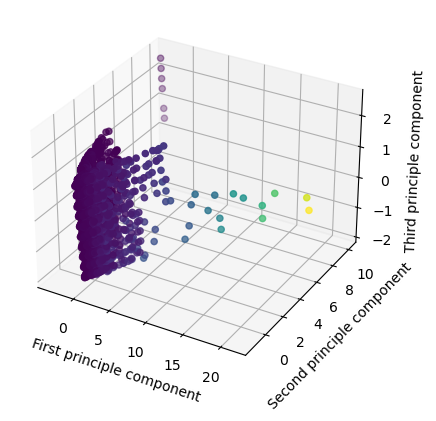

In [22]:
pca = PCA(n_components = 3)
#pca.fit_transform(dfs)
dfp = pca.fit_transform(dfs)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(dfp[:,0],dfp[:,1],dfp[:,2], c = df['Scholarship Dollars'])

ax.set_xlabel('First principle component')
ax.set_ylabel('Second principle component')
ax.set_zlabel('Third principle component')